Import section

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#accuracy measurement
from sklearn.metrics import accuracy_score

#model library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

#calculate curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

#matplotlib
import matplotlib.pyplot as plt

In [14]:
#data visualization
data = pd.read_csv("Cleaned-Data.csv")
data.head(3)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China


Pre-processing Section

In [15]:
#converting country column data into dummy data
data = pd.get_dummies(data)
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_China,Country_France,Country_Germany,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic of Korean,Country_Spain,Country_UAE
0,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [16]:
#add severity-type1 column from the values of Severity_Mild, Severity_Moderate, Severity_None, Severity_Severe for type 01 dataset
data['severity-type1'] = np.zeros(len(data), dtype=int)
data['severity-type1'] = np.where(data['Severity_Mild'] == 1, 1, data['severity-type1'])
data['severity-type1'] = np.where(data['Severity_Moderate'] == 1, 1, data['severity-type1'])
data['severity-type1'] = np.where(data['Severity_None'] == 1, 0, data['severity-type1'])
data['severity-type1'] = np.where(data['Severity_Severe'] == 1, 1, data['severity-type1'])
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_France,Country_Germany,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic of Korean,Country_Spain,Country_UAE,severity-type1
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#add severity-type2 column from the values of Severity_Mild, Severity_Moderate, Severity_None, Severity_Severe for type 02 dataset
data['severity-type2'] = np.zeros(len(data), dtype=int)
data['severity-type2'] = np.where(data['Severity_Mild'] == 1, 0, data['severity-type2'])
data['severity-type2'] = np.where(data['Severity_Moderate'] == 1, 1, data['severity-type2'])
data['severity-type2'] = np.where(data['Severity_None'] == 1, 0, data['severity-type2'])
data['severity-type2'] = np.where(data['Severity_Severe'] == 1, 1, data['severity-type2'])
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_Germany,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic of Korean,Country_Spain,Country_UAE,severity-type1,severity-type2
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1


In [18]:
#add severity-type3 column from the values of Severity_Mild, Severity_Moderate, Severity_None, Severity_Severe for type 03 dataset
data['severity-type3'] = np.zeros(len(data), dtype=int)
data['severity-type3'] = np.where(data['Severity_Mild'] == 1, 1, data['severity-type3'])
data['severity-type3'] = np.where(data['Severity_Moderate'] == 1, 2, data['severity-type3'])
data['severity-type3'] = np.where(data['Severity_None'] == 1, 0, data['severity-type3'])
data['severity-type3'] = np.where(data['Severity_Severe'] == 1, 3, data['severity-type3'])
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic of Korean,Country_Spain,Country_UAE,severity-type1,severity-type2,severity-type3
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,1,2
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,1,2


In [19]:
from collections import Counter
print(Counter(data['Pains']))
print(Counter(data['Nasal-Congestion']))
print(Counter(data['Runny-Nose']))
print(Counter(data['Diarrhea']))
print(Counter(data['None_Experiencing']))

Counter({0: 201600, 1: 115200})
Counter({1: 172800, 0: 144000})
Counter({1: 172800, 0: 144000})
Counter({0: 201600, 1: 115200})
Counter({0: 288000, 1: 28800})


In [20]:
#drop the column of Severity_Mild, Severity_Moderate, Severity_None, Severity_Severe
data.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe'], axis = 'columns', inplace = True)
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic of Korean,Country_Spain,Country_UAE,severity-type1,severity-type2,severity-type3
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,1,2
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,1,2


In [21]:
#analyze the feature
features = data.columns
features

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
       'Country_China', 'Country_France', 'Country_Germany', 'Country_Iran',
       'Country_Italy', 'Country_Other', 'Country_Other-EUR',
       'Country_Republic of Korean', 'Country_Spain', 'Country_UAE',
       'severity-type1', 'severity-type2', 'severity-type3'],
      dtype='object')

In [22]:
#choosing the feature
features = [x for x in features if x != 'severity-type1' and x != 'severity-type2' and x != 'severity-type3']
features

['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender',
 'Contact_Dont-Know',
 'Contact_No',
 'Contact_Yes',
 'Country_China',
 'Country_France',
 'Country_Germany',
 'Country_Iran',
 'Country_Italy',
 'Country_Other',
 'Country_Other-EUR',
 'Country_Republic of Korean',
 'Country_Spain',
 'Country_UAE']

In [23]:
def modelRun(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred

In [24]:
rf = RandomForestClassifier()
lr = LogisticRegression() 
dt = DecisionTreeClassifier(criterion='entropy')
nb = GaussianNB()
nn = MLPClassifier()

In [25]:
modelArray = [rf, lr, dt, nb, nn]
modelName = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes', 'Neural Network']
colorArray = ['red', 'orange', 'green', 'blue', 'yellow']

def compareModel(dataset_type, x_train, y_train, x_test, y_test):
    y_pred = []
    for name, model in zip(modelName, modelArray):
        result = modelRun(model, x_train, y_train, x_test, y_test)
        y_pred.append(result)


    accuracy = []
    f1_accuracy = []
    for predict in y_pred:
        accuracy.append(accuracy_score(y_test, predict) * 100)
        f1_accuracy.append(f1_score(y_test, predict, average='macro') * 100)

    print(f'#{dataset_type} dataset:')
    print('Accuracy score:')
    for name, value in zip(modelName, accuracy):
        print(f'Accuracy using {name}: {round(value, 2)}%')

    print('f1 score:')
    for name, value in zip(modelName, f1_accuracy):
        print(f'f1 score using {name}: {round(value, 2)}%')

    if dataset_type == 'type-03':
        return accuracy, f1_accuracy
    
    tpr = []
    fpr = []
    threshold = []
    for i in range(len(modelArray)):
        value = roc_curve(y_test, y_pred[i])
        fpr.append(value[0])
        tpr.append(value[1])
        threshold.append(value[2])

    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

    # plot roc curves
    for x, y, name, colorValue in zip(fpr, tpr, modelName, colorArray):
        plt.plot(x, y, color = colorValue, label = name)

    plt.plot(p_fpr, p_tpr, linestyle='dotted', color='blue')
    

    plt.title(f'ROC curve {dataset_type}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig(f'ROC {dataset_type}',dpi=300)
    plt.show()
    return accuracy, f1_accuracy

In [26]:
train, test = train_test_split(data, test_size = 0.2, random_state = 10007)
print(f'data length:{len(data)}')
print(f'train data length:{len(train)}')
print(f'test data length:{len(test)}')

data length:316800
train data length:253440
test data length:63360


#type-01 dataset:
Accuracy score:
Accuracy using Random Forest: 68.91%
Accuracy using Logistic Regression: 74.91%
Accuracy using Decision Tree: 53.33%
Accuracy using Gaussian Naive Bayes: 74.91%
Accuracy using Neural Network: 74.91%
f1 score:
f1 score using Random Forest: 40.8%
f1 score using Logistic Regression: 42.83%
f1 score using Decision Tree: 34.83%
f1 score using Gaussian Naive Bayes: 42.83%
f1 score using Neural Network: 42.83%


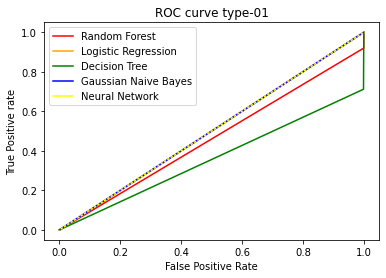

In [27]:
#type-1 dataset
x_train = train[features]
y_train1 = train['severity-type1']

x_test = test[features]
y_test1 = test['severity-type1']

type_01_accuracy, type_01_f1_accuracy = compareModel('type-01', x_train, y_train1, x_test, y_test1)

#type-02 dataset:
Accuracy score:
Accuracy using Random Forest: 16.35%
Accuracy using Logistic Regression: 49.45%
Accuracy using Decision Tree: 16.35%
Accuracy using Gaussian Naive Bayes: 49.58%
Accuracy using Neural Network: 47.64%
f1 score:
f1 score using Random Forest: 16.35%
f1 score using Logistic Regression: 49.45%
f1 score using Decision Tree: 14.95%
f1 score using Gaussian Naive Bayes: 49.33%
f1 score using Neural Network: 44.77%


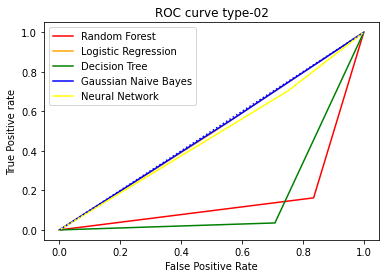

In [28]:
#type-2 dataset
x_train = train[features]
y_train2 = train['severity-type2']

x_test = test[features]
y_test2 = test['severity-type2']
type_02_accuracy, type_02_f1_accuracy = compareModel('type-02', x_train, y_train2, x_test, y_test2)

In [29]:
#type-3 datset
x_train = train[features]
y_train3 = train['severity-type3']

x_test = test[features]
y_test3 = test['severity-type3']
type_03_accuracy, type_03_f1_accuracy = compareModel('type-03', x_train, y_train3, x_test, y_test3)

#type-03 dataset:
Accuracy score:
Accuracy using Random Forest: 0.21%
Accuracy using Logistic Regression: 24.05%
Accuracy using Decision Tree: 0.21%
Accuracy using Gaussian Naive Bayes: 24.29%
Accuracy using Neural Network: 24.05%
f1 score:
f1 score using Random Forest: 0.21%
f1 score using Logistic Regression: 23.87%
f1 score using Decision Tree: 0.15%
f1 score using Gaussian Naive Bayes: 24.06%
f1 score using Neural Network: 15.8%


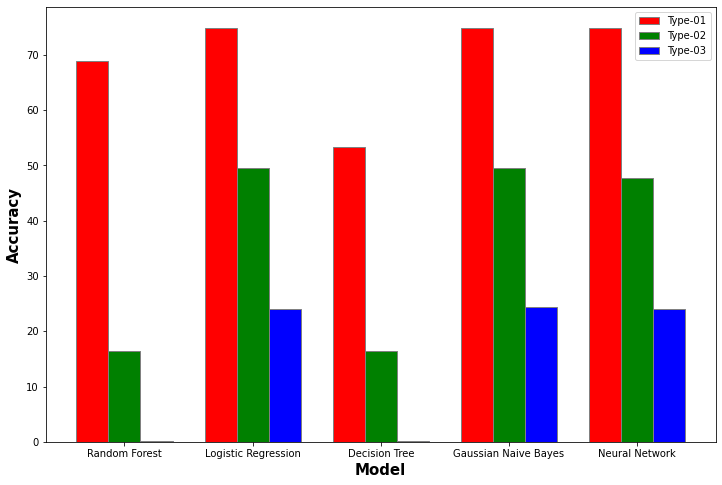

In [30]:
import matplotlib.pyplot as plt

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
br1 = np.arange(len(type_01_accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, type_01_accuracy, color ='r', width = barWidth, edgecolor ='grey', label ='Type-01')
plt.bar(br2, type_02_accuracy, color ='g', width = barWidth, edgecolor ='grey', label ='Type-02')
plt.bar(br3, type_03_accuracy, color ='b', width = barWidth, edgecolor ='grey', label ='Type-03')

plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(type_01_accuracy))], modelName)
 
plt.legend()
plt.show()

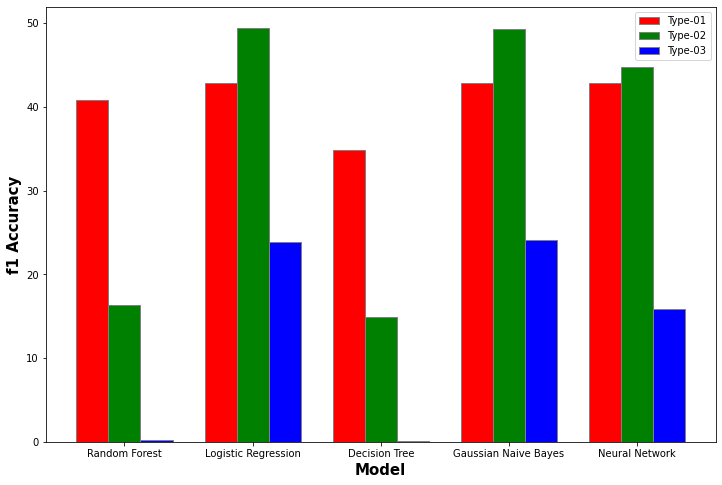

In [31]:
import matplotlib.pyplot as plt

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
br1 = np.arange(len(type_01_f1_accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, type_01_f1_accuracy, color ='r', width = barWidth, edgecolor ='grey', label ='Type-01')
plt.bar(br2, type_02_f1_accuracy, color ='g', width = barWidth, edgecolor ='grey', label ='Type-02')
plt.bar(br3, type_03_f1_accuracy, color ='b', width = barWidth, edgecolor ='grey', label ='Type-03')

plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('f1 Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(type_01_f1_accuracy))], modelName)

plt.legend()
plt.show()